In [49]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from decimal import *

filename = 'data/merged_data.csv'
df = pd.read_csv(filename, dtype={'NEXT OPEN HOUSE START TIME': 'str', 'NEXT OPEN HOUSE END TIME': 'str'})
print(df.shape)
print(df.columns)

#delete duplicate rows in dataframe
df_nodup = df.drop_duplicates(subset = ['ADDRESS', 'CITY'])
print(df_nodup.shape)

#delete useless columns
df_dropcol = df_nodup.drop(['Unnamed: 0', 'SALE TYPE', 'STATE', 'DAYS ON MARKET', 'STATUS', 'NEXT OPEN HOUSE START TIME', 'NEXT OPEN HOUSE END TIME', 'FAVORITE', 'INTERESTED'], axis = 1)
print(df_dropcol.shape)

#delete rows with missing values in important columns
df_na = df_dropcol.replace('', np.nan)
#df_nomissing = df_na.dropna(subset = ['SOLD DATE', 'PROPERTY TYPE', 'ADDRESS', 'CITY', 'ZIP', 'PRICE', 'BEDS', 'BATHS', 'SQUARE FEET', 'YEAR BUILT']) 
df_nomissing = df_na.dropna(subset = ['PROPERTY TYPE', 'PRICE']) 
print(df_nomissing.shape)


(69468, 28)
Index(['Unnamed: 0', 'SALE TYPE', 'SOLD DATE', 'PROPERTY TYPE', 'ADDRESS',
       'CITY', 'STATE', 'ZIP', 'PRICE', 'BEDS', 'BATHS', 'LOCATION',
       'SQUARE FEET', 'LOT SIZE', 'YEAR BUILT', 'DAYS ON MARKET',
       '$/SQUARE FEET', 'HOA/MONTH', 'STATUS', 'NEXT OPEN HOUSE START TIME',
       'NEXT OPEN HOUSE END TIME',
       'URL (SEE http://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING)',
       'SOURCE', 'MLS#', 'FAVORITE', 'INTERESTED', 'LATITUDE', 'LONGITUDE'],
      dtype='object')
(41250, 28)
(41250, 19)
(41243, 19)


In [50]:
df_nomissing.head()

,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,ZIP,PRICE,BEDS,BATHS,LOCATION,SQUARE FEET,LOT SIZE,YEAR BUILT,$/SQUARE FEET,HOA/MONTH,URL (SEE http://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING),SOURCE,MLS#,LATITUDE,LONGITUDE
0,October-10-2017,Single Family Residential,717 Neuchatel Ave,BURLINGAME,94010,1450000.0,2.0,1.0,BURLINGAME,940.0,3441.0,1926.0,1543.0,NaN,http://www.redfin.com/CA/Burlingame/717-Neucha...,MLSListings,ML81676096,37.581731,-122.352860
1,June-20-2017,Single Family Residential,544 Heathcliff Dr,PACIFICA,94044,1210000.0,4.0,2.0,PACIFICA,1840.0,8476.0,1958.0,658.0,NaN,http://www.redfin.com/CA/Pacifica/544-Heathcli...,MLSListings,ML81649946,37.646466,-122.475213
2,November-14-2016,Townhouse,1052 Hull Ln,FOSTER CITY,94404,1165000.0,2.0,2.5,FOSTER CITY,1510.0,808.0,1989.0,772.0,435.0,http://www.redfin.com/CA/Foster-City/1052-Hull...,MLSListings,ML81626697,37.548055,-122.255424
3,June-9-2017,Townhouse,855 Columbia Cir,REDWOOD CITY,94065,1500000.0,3.0,3.0,REDWOOD CITY,1939.0,514279.0,1989.0,774.0,455.0,http://www.redfin.com/CA/Redwood-City/855-Colu...,MLSListings,ML81653755,37.536381,-122.237631
4,July-21-2016,Townhouse,316 S Humboldt St,San Mateo,94401,965000.0,2.0,2.5,San Mateo,1580.0,NaN,1999.0,611.0,295.0,http://www.redfin.com/CA/San-Mateo/316-S-Humbo...,San Francisco MLS,445973,37.568960,-122.315889


In [51]:
df_nomissing.columns

Index(['SOLD DATE', 'PROPERTY TYPE', 'ADDRESS', 'CITY', 'ZIP', 'PRICE', 'BEDS',
       'BATHS', 'LOCATION', 'SQUARE FEET', 'LOT SIZE', 'YEAR BUILT',
       '$/SQUARE FEET', 'HOA/MONTH',
       'URL (SEE http://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING)',
       'SOURCE', 'MLS#', 'LATITUDE', 'LONGITUDE'],
      dtype='object')

In [52]:
# delete rows which property type is unknown/other/vacant land/Multi-Family
df_protype = df_nomissing[df_nomissing['PROPERTY TYPE'] != 'Unknown']
df_protype = df_protype[df_protype['PROPERTY TYPE'] != 'Vacant Land']
df_protype = df_protype[df_protype['PROPERTY TYPE'] != 'Other']
df_protype = df_protype[df_protype['PROPERTY TYPE'] != 'Mobile/Manufactured Home']
df_protype = df_protype[df_protype['PROPERTY TYPE'] != 'Multi-Family (2-4 Unit)']
df_protype = df_protype[df_protype['PROPERTY TYPE'] != 'Multi-Family (5+ Unit)']
df_protype.shape

(38391, 19)

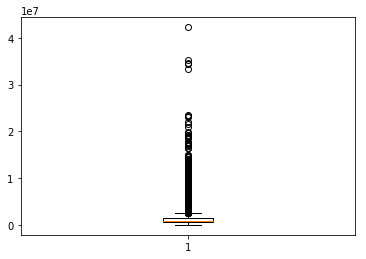

In [53]:
plt.boxplot(df_protype['PRICE'])
plt.show()

In [54]:
# plt.boxplot(df_protype['BEDS'])
# plt.show()

In [55]:
# plt.boxplot(df_protype['BATHS'])
# plt.show()

In [56]:
# delete outliers
df_byvalue = df_protype.sort_values(by = ['PRICE'])
df_byvalue.head()
df_nooutlier = df_byvalue[df_byvalue['PRICE'] > 100000]
df_nooutlier.head()

,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,ZIP,PRICE,BEDS,BATHS,LOCATION,SQUARE FEET,LOT SIZE,YEAR BUILT,$/SQUARE FEET,HOA/MONTH,URL (SEE http://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING),SOURCE,MLS#,LATITUDE,LONGITUDE
10091,NaN,Single Family Residential,1123 Brunswick St,Daly City,94014,100500.0,2.0,1.0,NaN,1030.0,2500.0,1916.0,98.0,NaN,http://www.redfin.com/CA/Daly-City/1123-Brunsw...,NaN,NaN,37.705789,-122.456480
56559,NaN,Single Family Residential,17382 Via La Jolla,San Lorenzo,94580,101000.0,3.0,2.0,NaN,1229.0,5200.0,1951.0,82.0,NaN,http://www.redfin.com/CA/San-Lorenzo/17382-Via...,NaN,NaN,37.665810,-122.135079
41881,NaN,Condo/Co-op,1750 Halford Ave Apt 105,Santa Clara,95051,102000.0,1.0,1.0,NaN,678.0,NaN,1970.0,150.0,NaN,http://www.redfin.com/CA/Santa-Clara/1750-Half...,NaN,NaN,37.355715,-121.998715
41052,NaN,Single Family Residential,888 Palm St,San Jose,95110,102000.0,2.0,1.0,NaN,884.0,6750.0,1913.0,115.0,NaN,http://www.redfin.com/CA/San-Jose/888-Palm-St-...,NaN,NaN,37.319633,-121.886415
46106,NaN,Single Family Residential,1431 86th Ave,Oakland,94621,102500.0,2.0,1.0,NaN,1029.0,5320.0,1927.0,100.0,NaN,http://www.redfin.com/CA/Oakland/1431-86th-Ave...,NaN,NaN,37.753451,-122.176025


In [57]:
df_nooutlier.tail(10)

,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,ZIP,PRICE,BEDS,BATHS,LOCATION,SQUARE FEET,LOT SIZE,YEAR BUILT,$/SQUARE FEET,HOA/MONTH,URL (SEE http://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING),SOURCE,MLS#,LATITUDE,LONGITUDE
23724,NaN,Single Family Residential,3793 Woodside Rd,Woodside,94062,21500000.0,3.0,3.0,NaN,3380.0,612018.0,1952.0,6361.0,NaN,http://www.redfin.com/CA/Woodside/3793-Woodsid...,NaN,NaN,37.416888,-122.263879
23803,September-26-2016,Single Family Residential,231 Winding Way,WOODSIDE,94062,22000000.0,6.0,5.0,WOODSIDE,11400.0,121968.0,2016.0,1930.0,NaN,http://www.redfin.com/CA/Woodside/231-Winding-...,MLSListings,ML81596027,37.415543,-122.249049
6121,NaN,Single Family Residential,49 Tuscaloosa Ave,Atherton,94027,23000000.0,7.0,7.0,NaN,5740.0,66621.0,1928.0,4007.0,NaN,http://www.redfin.com/CA/Atherton/49-Tuscaloos...,NaN,NaN,37.460086,-122.204205
22641,June-16-2017,Single Family Residential,891 Crystal Springs Rd,HILLSBOROUGH,94010,23364000.0,10.0,9.5,HILLSBOROUGH,16000.0,2064744.0,1916.0,1460.0,NaN,http://www.redfin.com/CA/Hillsborough/Undisclo...,MLSListings,ML81497015,37.547667,-122.342808
38088,December-14-2017,Single Family Residential,215 Coleridge Ave,PALO ALTO,94301,23495000.0,6.0,4.5,PALO ALTO,4586.0,32500.0,1922.0,5123.0,NaN,http://www.redfin.com/CA/Palo-Alto/215-Colerid...,MLSListings,ML81685906,37.436556,-122.149126
7528,December-1-2016,Single Family Residential,246 Atherton Ave,ATHERTON,94027,33350000.0,7.0,8.5,ATHERTON,18258.0,110206.0,2015.0,1827.0,NaN,http://www.redfin.com/CA/Atherton/246-Atherton...,MLSListings,ML81563851,37.445697,-122.213993
7504,NaN,Single Family Residential,207 Atherton Ave,Atherton,94027,34500000.0,7.0,6.0,NaN,12328.0,105851.0,1939.0,2799.0,NaN,http://www.redfin.com/CA/Atherton/207-Atherton...,NaN,NaN,37.448894,-122.208579
1608,NaN,Single Family Residential,15 Hidden Valley Ln,WOODSIDE,94062.0,34600000.0,6.0,3.5,WOODSIDE,8826.0,279219.0,2003.0,3920.0,NaN,http://www.redfin.com/CA/Woodside/Undisclosed-...,MLSListings,ML81688409,37.387803,-122.229808
7320,November-3-2015,Single Family Residential,119 Tuscaloosa Ave,ATHERTON,94027,35300000.0,7.0,9.5,ATHERTON,20375.0,82000.0,2015.0,1733.0,NaN,http://www.redfin.com/CA/Atherton/119-Tuscaloo...,MLSListings,ML81515494,37.455600,-122.207416
48120,NaN,Condo/Co-op,1100 Pacific Marina,Alameda,94501,42250000.0,147.0,98.0,NaN,77660.0,NaN,1966.0,544.0,NaN,http://www.redfin.com/CA/Alameda/1100-Pacific-...,NaN,NaN,37.782405,-122.264603


In [58]:
df_nooutlier.sort_values(by = ['BEDS']).tail(20)

,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,ZIP,PRICE,BEDS,BATHS,LOCATION,SQUARE FEET,LOT SIZE,YEAR BUILT,$/SQUARE FEET,HOA/MONTH,URL (SEE http://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING),SOURCE,MLS#,LATITUDE,LONGITUDE
46500,NaN,Single Family Residential,4457 Howe St,Oakland,94611,1800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.redfin.com/CA/Oakland/4457-Howe-St-...,NaN,NaN,37.831744,-122.247021
36394,NaN,Single Family Residential,3100 Pyramid Way,Mountain View,94043,1819000.0,NaN,NaN,NaN,NaN,2175.0,NaN,NaN,NaN,http://www.redfin.com/CA/Mountain-View/3100-Py...,NaN,NaN,37.392072,-122.056241
54718,NaN,Single Family Residential,46499 Roadrunner Rd,Fremont,94539,1900000.0,NaN,NaN,NaN,3136.0,11261.0,1979.0,606.0,NaN,http://www.redfin.com/CA/Fremont/46499-Roadrun...,NaN,NaN,37.497741,-121.910970
43305,NaN,Townhouse,12260 Saratoga Sunnyvale Rd,Saratoga,95070,1976000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.redfin.com/CA/Saratoga/12260-Sarato...,NaN,NaN,37.290039,-122.030668
18586,NaN,Condo/Co-op,2600 S Delaware St #1,San Mateo,94403,2040500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.redfin.com/CA/San-Mateo/2600-S-Dela...,NaN,NaN,37.541380,-122.295782
3780,NaN,Condo/Co-op,633 Waller St,San Francisco,94117,2050000.0,NaN,NaN,NaN,2075.0,NaN,1895.0,988.0,NaN,http://www.redfin.com/CA/San-Francisco/633-Wal...,NaN,NaN,37.770468,-122.434070
3774,NaN,Condo/Co-op,1054 Haight St #3,San Francisco,94117,2150000.0,NaN,2.0,NaN,1254.0,NaN,2007.0,1715.0,NaN,http://www.redfin.com/CA/San-Francisco/1054-Ha...,NaN,NaN,37.771221,-122.439842
13620,NaN,Single Family Residential,1450 Alamo St,Montara,94037.0,2212000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.redfin.com/CA/Montara/1450-Alamo-St...,NaN,NaN,37.535673,-122.495076
32102,NaN,Single Family Residential,20201 Thompson Rd,Los Gatos,95033,2300000.0,NaN,NaN,NaN,NaN,506250.0,1930.0,NaN,NaN,http://www.redfin.com/CA/Los-Gatos/20201-Thomp...,NaN,NaN,37.189305,-122.022518
181,NaN,Single Family Residential,17500 Cabrillo Hwy S,Half Moon Bay,94019,2850100.0,NaN,NaN,NaN,NaN,203512.0,NaN,NaN,NaN,http://www.redfin.com/CA/Half-Moon-Bay/17500-C...,NaN,NaN,37.422624,-122.430215


In [59]:
df_nooutlier.sort_values(by = ['BATHS']).tail(20)

,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,ZIP,PRICE,BEDS,BATHS,LOCATION,SQUARE FEET,LOT SIZE,YEAR BUILT,$/SQUARE FEET,HOA/MONTH,URL (SEE http://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING),SOURCE,MLS#,LATITUDE,LONGITUDE
36393,NaN,Single Family Residential,3200 Pyramid Way,Mountain View,94043,1757500.0,NaN,NaN,NaN,NaN,1896.0,NaN,NaN,NaN,http://www.redfin.com/CA/Mountain-View/3200-Py...,NaN,NaN,37.392072,-122.056241
36397,NaN,Single Family Residential,3112 Pyramid Way,Mountain View,94043,1761500.0,NaN,NaN,NaN,NaN,1635.0,NaN,NaN,NaN,http://www.redfin.com/CA/Mountain-View/3112-Py...,NaN,NaN,37.392072,-122.056241
36415,NaN,Single Family Residential,3122 Pyramid Way,Mountain View,94043,1768500.0,NaN,NaN,NaN,NaN,2177.0,NaN,NaN,NaN,http://www.redfin.com/CA/Mountain-View/3122-Py...,NaN,NaN,37.392108,-122.055877
46500,NaN,Single Family Residential,4457 Howe St,Oakland,94611,1800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.redfin.com/CA/Oakland/4457-Howe-St-...,NaN,NaN,37.831744,-122.247021
36394,NaN,Single Family Residential,3100 Pyramid Way,Mountain View,94043,1819000.0,NaN,NaN,NaN,NaN,2175.0,NaN,NaN,NaN,http://www.redfin.com/CA/Mountain-View/3100-Py...,NaN,NaN,37.392072,-122.056241
54718,NaN,Single Family Residential,46499 Roadrunner Rd,Fremont,94539,1900000.0,NaN,NaN,NaN,3136.0,11261.0,1979.0,606.0,NaN,http://www.redfin.com/CA/Fremont/46499-Roadrun...,NaN,NaN,37.497741,-121.910970
43305,NaN,Townhouse,12260 Saratoga Sunnyvale Rd,Saratoga,95070,1976000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.redfin.com/CA/Saratoga/12260-Sarato...,NaN,NaN,37.290039,-122.030668
18586,NaN,Condo/Co-op,2600 S Delaware St #1,San Mateo,94403,2040500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.redfin.com/CA/San-Mateo/2600-S-Dela...,NaN,NaN,37.541380,-122.295782
3780,NaN,Condo/Co-op,633 Waller St,San Francisco,94117,2050000.0,NaN,NaN,NaN,2075.0,NaN,1895.0,988.0,NaN,http://www.redfin.com/CA/San-Francisco/633-Wal...,NaN,NaN,37.770468,-122.434070
13620,NaN,Single Family Residential,1450 Alamo St,Montara,94037.0,2212000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.redfin.com/CA/Montara/1450-Alamo-St...,NaN,NaN,37.535673,-122.495076


In [60]:
df_nooutlier.shape

(38273, 19)

In [61]:
df_nooutlier.head()

,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,ZIP,PRICE,BEDS,BATHS,LOCATION,SQUARE FEET,LOT SIZE,YEAR BUILT,$/SQUARE FEET,HOA/MONTH,URL (SEE http://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING),SOURCE,MLS#,LATITUDE,LONGITUDE
10091,NaN,Single Family Residential,1123 Brunswick St,Daly City,94014,100500.0,2.0,1.0,NaN,1030.0,2500.0,1916.0,98.0,NaN,http://www.redfin.com/CA/Daly-City/1123-Brunsw...,NaN,NaN,37.705789,-122.456480
56559,NaN,Single Family Residential,17382 Via La Jolla,San Lorenzo,94580,101000.0,3.0,2.0,NaN,1229.0,5200.0,1951.0,82.0,NaN,http://www.redfin.com/CA/San-Lorenzo/17382-Via...,NaN,NaN,37.665810,-122.135079
41881,NaN,Condo/Co-op,1750 Halford Ave Apt 105,Santa Clara,95051,102000.0,1.0,1.0,NaN,678.0,NaN,1970.0,150.0,NaN,http://www.redfin.com/CA/Santa-Clara/1750-Half...,NaN,NaN,37.355715,-121.998715
41052,NaN,Single Family Residential,888 Palm St,San Jose,95110,102000.0,2.0,1.0,NaN,884.0,6750.0,1913.0,115.0,NaN,http://www.redfin.com/CA/San-Jose/888-Palm-St-...,NaN,NaN,37.319633,-121.886415
46106,NaN,Single Family Residential,1431 86th Ave,Oakland,94621,102500.0,2.0,1.0,NaN,1029.0,5320.0,1927.0,100.0,NaN,http://www.redfin.com/CA/Oakland/1431-86th-Ave...,NaN,NaN,37.753451,-122.176025


In [62]:
df_nooutlier = df_nooutlier.replace('Single Family Residential', 'SFH')
df_nooutlier = df_nooutlier.replace('Townhouse', 'TH')
df_nooutlier = df_nooutlier.replace('Condo/Co-op', 'Condo')

In [63]:
df_nooutlier.head()

,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,ZIP,PRICE,BEDS,BATHS,LOCATION,SQUARE FEET,LOT SIZE,YEAR BUILT,$/SQUARE FEET,HOA/MONTH,URL (SEE http://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING),SOURCE,MLS#,LATITUDE,LONGITUDE
10091,NaN,SFH,1123 Brunswick St,Daly City,94014,100500.0,2.0,1.0,NaN,1030.0,2500.0,1916.0,98.0,NaN,http://www.redfin.com/CA/Daly-City/1123-Brunsw...,NaN,NaN,37.705789,-122.456480
56559,NaN,SFH,17382 Via La Jolla,San Lorenzo,94580,101000.0,3.0,2.0,NaN,1229.0,5200.0,1951.0,82.0,NaN,http://www.redfin.com/CA/San-Lorenzo/17382-Via...,NaN,NaN,37.665810,-122.135079
41881,NaN,Condo,1750 Halford Ave Apt 105,Santa Clara,95051,102000.0,1.0,1.0,NaN,678.0,NaN,1970.0,150.0,NaN,http://www.redfin.com/CA/Santa-Clara/1750-Half...,NaN,NaN,37.355715,-121.998715
41052,NaN,SFH,888 Palm St,San Jose,95110,102000.0,2.0,1.0,NaN,884.0,6750.0,1913.0,115.0,NaN,http://www.redfin.com/CA/San-Jose/888-Palm-St-...,NaN,NaN,37.319633,-121.886415
46106,NaN,SFH,1431 86th Ave,Oakland,94621,102500.0,2.0,1.0,NaN,1029.0,5320.0,1927.0,100.0,NaN,http://www.redfin.com/CA/Oakland/1431-86th-Ave...,NaN,NaN,37.753451,-122.176025


In [64]:
df_nooutlier['CITY'] = df_nooutlier['CITY'].astype(str).apply(lambda city: city.upper())
df_nooutlier = df_nooutlier.replace('S San Francisco', 'SOUTH SAN FRANCISCO')
df_nooutlier = df_nooutlier.replace('So. San Francisco', 'SOUTH SAN FRANCISCO')
df_nooutlier = df_nooutlier.replace('Redwood Shores', 'REDWOOD CITY')
df_nooutlier = df_nooutlier[df_nooutlier['CITY'] != 'Out of Area']
df_nooutlier = df_nooutlier[df_nooutlier['CITY'] != 'Outside Arizona']
df_nooutlier.head()


,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,ZIP,PRICE,BEDS,BATHS,LOCATION,SQUARE FEET,LOT SIZE,YEAR BUILT,$/SQUARE FEET,HOA/MONTH,URL (SEE http://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING),SOURCE,MLS#,LATITUDE,LONGITUDE
10091,NaN,SFH,1123 Brunswick St,DALY CITY,94014,100500.0,2.0,1.0,NaN,1030.0,2500.0,1916.0,98.0,NaN,http://www.redfin.com/CA/Daly-City/1123-Brunsw...,NaN,NaN,37.705789,-122.456480
56559,NaN,SFH,17382 Via La Jolla,SAN LORENZO,94580,101000.0,3.0,2.0,NaN,1229.0,5200.0,1951.0,82.0,NaN,http://www.redfin.com/CA/San-Lorenzo/17382-Via...,NaN,NaN,37.665810,-122.135079
41881,NaN,Condo,1750 Halford Ave Apt 105,SANTA CLARA,95051,102000.0,1.0,1.0,NaN,678.0,NaN,1970.0,150.0,NaN,http://www.redfin.com/CA/Santa-Clara/1750-Half...,NaN,NaN,37.355715,-121.998715
41052,NaN,SFH,888 Palm St,SAN JOSE,95110,102000.0,2.0,1.0,NaN,884.0,6750.0,1913.0,115.0,NaN,http://www.redfin.com/CA/San-Jose/888-Palm-St-...,NaN,NaN,37.319633,-121.886415
46106,NaN,SFH,1431 86th Ave,OAKLAND,94621,102500.0,2.0,1.0,NaN,1029.0,5320.0,1927.0,100.0,NaN,http://www.redfin.com/CA/Oakland/1431-86th-Ave...,NaN,NaN,37.753451,-122.176025


In [65]:
df_nooutlier.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38273 entries, 10091 to 48120
Data columns (total 19 columns):
SOLD DATE                                                                                     31196 non-null object
PROPERTY TYPE                                                                                 38273 non-null object
ADDRESS                                                                                       38256 non-null object
CITY                                                                                          38273 non-null object
ZIP                                                                                           38267 non-null object
PRICE                                                                                         38273 non-null float64
BEDS                                                                                          38022 non-null float64
BATHS                                                                    

In [66]:
df_nooutlier['PRICE'] = df_nooutlier['PRICE']/1000.0
df_nooutlier.rename(columns={'PRICE':'PRICE IN K'}, inplace=True)
df_nooutlier.head(100)

,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,ZIP,PRICE IN K,BEDS,BATHS,LOCATION,SQUARE FEET,LOT SIZE,YEAR BUILT,$/SQUARE FEET,HOA/MONTH,URL (SEE http://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING),SOURCE,MLS#,LATITUDE,LONGITUDE
10091,NaN,SFH,1123 Brunswick St,DALY CITY,94014,100.5,2.0,1.0,NaN,1030.0,2500.0,1916.0,98.0,NaN,http://www.redfin.com/CA/Daly-City/1123-Brunsw...,NaN,NaN,37.705789,-122.456480
56559,NaN,SFH,17382 Via La Jolla,SAN LORENZO,94580,101.0,3.0,2.0,NaN,1229.0,5200.0,1951.0,82.0,NaN,http://www.redfin.com/CA/San-Lorenzo/17382-Via...,NaN,NaN,37.665810,-122.135079
41881,NaN,Condo,1750 Halford Ave Apt 105,SANTA CLARA,95051,102.0,1.0,1.0,NaN,678.0,NaN,1970.0,150.0,NaN,http://www.redfin.com/CA/Santa-Clara/1750-Half...,NaN,NaN,37.355715,-121.998715
41052,NaN,SFH,888 Palm St,SAN JOSE,95110,102.0,2.0,1.0,NaN,884.0,6750.0,1913.0,115.0,NaN,http://www.redfin.com/CA/San-Jose/888-Palm-St-...,NaN,NaN,37.319633,-121.886415
46106,NaN,SFH,1431 86th Ave,OAKLAND,94621,102.5,2.0,1.0,NaN,1029.0,5320.0,1927.0,100.0,NaN,http://www.redfin.com/CA/Oakland/1431-86th-Ave...,NaN,NaN,37.753451,-122.176025
53635,NaN,SFH,5502 Vallejo St,OAKLAND,94608,102.5,2.0,1.0,NaN,657.0,4000.0,1908.0,156.0,NaN,http://www.redfin.com/CA/Oakland/5502-Vallejo-...,NaN,NaN,37.838201,-122.284831
27062,NaN,Condo,3586 Payne Ave Apt 4,SAN JOSE,95117,102.5,2.0,1.0,NaN,910.0,NaN,1963.0,113.0,NaN,http://www.redfin.com/CA/San-Jose/3586-Payne-A...,NaN,NaN,37.299771,-121.962429
29482,NaN,SFH,7272 Rosanna St,GILROY,95020,102.5,3.0,1.0,NaN,928.0,4500.0,1906.0,110.0,NaN,http://www.redfin.com/CA/Gilroy/7272-Rosanna-S...,NaN,NaN,37.003751,-121.571141
68501,NaN,SFH,3811 Delaware Dr,FREMONT,94538,103.0,3.0,2.0,NaN,1248.0,6100.0,1960.0,83.0,NaN,http://www.redfin.com/CA/Fremont/3811-Delaware...,NaN,NaN,37.519636,-121.954221
24566,NaN,Condo,2326 Saidel Dr Apt 3,SAN JOSE,95124,103.0,2.0,1.0,NaN,903.0,NaN,1973.0,114.0,NaN,http://www.redfin.com/CA/San-Jose/2326-Saidel-...,NaN,NaN,37.251487,-121.942102


In [69]:
county = 'data/county.csv'
county_city = pd.read_csv(county)
county_city.head()

,CITY,COUNTY
0,SAN FRANCISCO,SAN FRANCISCO
1,DALY CITY,SAN MATEO
2,SAN MATEO,SAN MATEO
3,REDWOOD CITY,SAN MATEO
4,SOUTH SAN FRANCISCO,SAN MATEO


In [70]:
df = pd.merge(df_nooutlier, county_city, how = 'left', on = 'CITY')
df.head(100)

,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,ZIP,PRICE IN K,BEDS,BATHS,LOCATION,SQUARE FEET,LOT SIZE,YEAR BUILT,$/SQUARE FEET,HOA/MONTH,URL (SEE http://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING),SOURCE,MLS#,LATITUDE,LONGITUDE,COUNTY
0,NaN,SFH,1123 Brunswick St,DALY CITY,94014,100.5,2.0,1.0,NaN,1030.0,2500.0,1916.0,98.0,NaN,http://www.redfin.com/CA/Daly-City/1123-Brunsw...,NaN,NaN,37.705789,-122.456480,SAN MATEO
1,NaN,SFH,17382 Via La Jolla,SAN LORENZO,94580,101.0,3.0,2.0,NaN,1229.0,5200.0,1951.0,82.0,NaN,http://www.redfin.com/CA/San-Lorenzo/17382-Via...,NaN,NaN,37.665810,-122.135079,ALAMEDA
2,NaN,Condo,1750 Halford Ave Apt 105,SANTA CLARA,95051,102.0,1.0,1.0,NaN,678.0,NaN,1970.0,150.0,NaN,http://www.redfin.com/CA/Santa-Clara/1750-Half...,NaN,NaN,37.355715,-121.998715,SANTA CLARA
3,NaN,SFH,888 Palm St,SAN JOSE,95110,102.0,2.0,1.0,NaN,884.0,6750.0,1913.0,115.0,NaN,http://www.redfin.com/CA/San-Jose/888-Palm-St-...,NaN,NaN,37.319633,-121.886415,SANTA CLARA
4,NaN,SFH,1431 86th Ave,OAKLAND,94621,102.5,2.0,1.0,NaN,1029.0,5320.0,1927.0,100.0,NaN,http://www.redfin.com/CA/Oakland/1431-86th-Ave...,NaN,NaN,37.753451,-122.176025,ALAMEDA
5,NaN,SFH,5502 Vallejo St,OAKLAND,94608,102.5,2.0,1.0,NaN,657.0,4000.0,1908.0,156.0,NaN,http://www.redfin.com/CA/Oakland/5502-Vallejo-...,NaN,NaN,37.838201,-122.284831,ALAMEDA
6,NaN,Condo,3586 Payne Ave Apt 4,SAN JOSE,95117,102.5,2.0,1.0,NaN,910.0,NaN,1963.0,113.0,NaN,http://www.redfin.com/CA/San-Jose/3586-Payne-A...,NaN,NaN,37.299771,-121.962429,SANTA CLARA
7,NaN,SFH,7272 Rosanna St,GILROY,95020,102.5,3.0,1.0,NaN,928.0,4500.0,1906.0,110.0,NaN,http://www.redfin.com/CA/Gilroy/7272-Rosanna-S...,NaN,NaN,37.003751,-121.571141,SANTA CLARA
8,NaN,SFH,3811 Delaware Dr,FREMONT,94538,103.0,3.0,2.0,NaN,1248.0,6100.0,1960.0,83.0,NaN,http://www.redfin.com/CA/Fremont/3811-Delaware...,NaN,NaN,37.519636,-121.954221,ALAMEDA
9,NaN,Condo,2326 Saidel Dr Apt 3,SAN JOSE,95124,103.0,2.0,1.0,NaN,903.0,NaN,1973.0,114.0,NaN,http://www.redfin.com/CA/San-Jose/2326-Saidel-...,NaN,NaN,37.251487,-121.942102,SANTA CLARA


In [71]:
df.to_csv('data/cleaned_data.csv')

In [44]:
df.shape

(38273, 20)